## Table of Content

* Libraries Required
* Creating a basic environment and various parameters of environment
* Q-Table
* Q-Function
* Buckets
* Initializing the Q-Table
* Populating the Q-Table(Size of Q-Table)


# 1. Libraries Required
The most important library that we are going to use here is gym and numpy                                                   
If not installed run these 2 lines:                                                                                         
` !pip install gym`                                                                                                         
` !pip install numpy`

# 2. Creating a basic environment 

In [6]:
import gym

env = gym.make('MountainCar-v0')
# The first step to do in any environment is to reset it
env.reset()
#For iteration purpose
done = False

while not done:
#here there are 3 actions only 0,1,2 stop move right move left
    action = 2
    
    new_state , reward , done , _ = env.step(action)
    print(new_state,reward)
#New State in this case is basically the position and velocity 
    env.render()

env.close()

[-0.5181575   0.00096644] -1.0
[-0.51623183  0.00192563] -1.0
[-0.51336145  0.00287038] -1.0
[-0.50956786  0.00379362] -1.0
[-0.5048794   0.00468841] -1.0
[-0.49933133  0.00554809] -1.0
[-0.49296507  0.00636625] -1.0
[-0.48582825  0.00713682] -1.0
[-0.47797412  0.00785415] -1.0
[-0.46946108  0.00851303] -1.0
[-0.4603523   0.00910878] -1.0
[-0.45071504  0.00963727] -1.0
[-0.44062003  0.01009499] -1.0
[-0.430141    0.01047906] -1.0
[-0.41935372  0.01078727] -1.0
[-0.4083356   0.01101811] -1.0
[-0.39716485  0.01117076] -1.0
[-0.38591975  0.01124508] -1.0
[-0.37467816  0.0112416 ] -1.0
[-0.36351666  0.01116148] -1.0
[-0.35251018  0.01100649] -1.0
[-0.34173125  0.01077893] -1.0
[-0.33124965  0.01048159] -1.0
[-0.32113194  0.01011771] -1.0
[-0.31144106  0.00969088] -1.0
[-0.3022361   0.00920497] -1.0
[-0.29357198  0.00866412] -1.0
[-0.28549936  0.00807262] -1.0
[-0.27806446  0.0074349 ] -1.0
[-0.271309    0.00675546] -1.0
[-0.26527014  0.00603884] -1.0
[-0.2599806   0.00528958] -1.0
[-0.2554

## Things to Note
* new_state is giving the position and velocity
* reward is -1 as it is not reaching the goal flag

#### Output Window
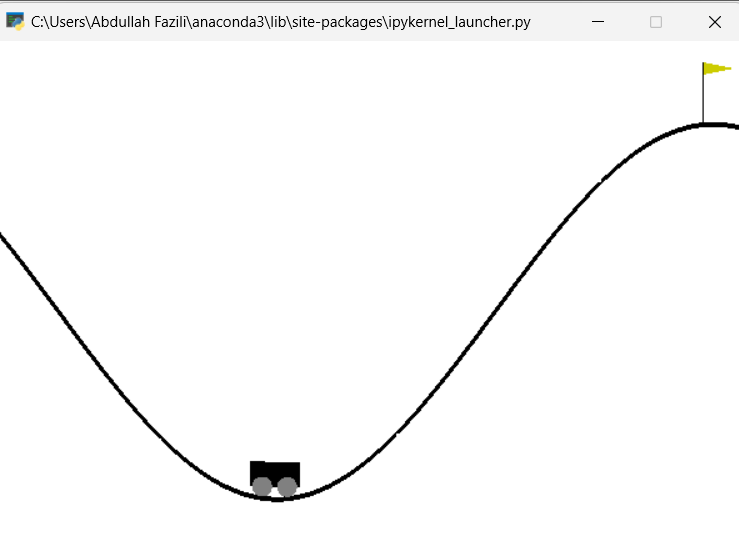

# 3. Q-Table 
#### Q-Table is just simple table where we store the Q-Values
* In our case what Q-Table will depict is that a table which will store all possible Q-values for all 3 possible action for all possible states(position and Velocity combination) and we will just pick up the max value from the table 
#### It is initially populated with random values then corresponding Q-Values are filled using the equation:
* We will see how we can populate this Q-Table soon


# 4. Q-Function
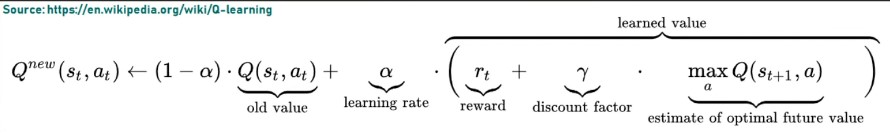

# 5. Bucket
* What does bucketting basically means is that it allows us to create discrete values out of the continuous values that we've got from the new_state. This helps in saving computational power

* These continuous values to discrete values
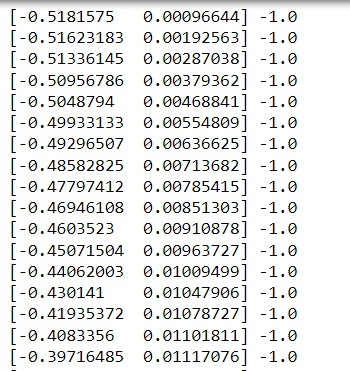

### How we can perform bucketting is by using the high and low of observation space along with the envs action space using these 3 values we can create a Q-Table having discrete values

In [8]:
import gym

env = gym.make('MountainCar-v0')
env.reset()
#Findig High Low and Action Space
print("High is: ",env.observation_space.high)
print("Low is: ",env.observation_space.low)
print("Action Space is: ",env.action_space.n)

done = False
while not done:

    action = 2    
    new_state , reward , done , _ = env.step(action)
    env.render()

env.close()

High is:  [0.6  0.07]
Low is:  [-1.2  -0.07]
Action Space is:  3


### Now before using these values we have to set the size of the Q-Table
The Size of Q Table is NxM                                                                                                 
` N--> N columns and depicting Number of actions`                                                                                     
` M--> M rows and depicting Number of States ` 

` Rough Population --> [NxM] `                                                                                           * 

*  There is no hard and fast rule while declaring the values of M and N, These values can change according to the agent.I've kept it 20 just to keep the table managable for understanding purpose
* Here N = len(env.obs_space.high)
* M = lets say (20)
* So a table of 20x20 will be created and Now we have to populate this table from max to min in 20 chunks 


In [12]:
observation_space_size = [20] * len(env.observation_space.high)
print(observation_space_size)

[20, 20]


### Now we have to populate this 20x20 table with discrete values/buckets ranging from High to low i.e., 
* High is:  [0.6 , 0.07]                                                                                                   
* Low is:  [-1.2 , -0.07]


1. The first thing we need to find out is how big are these values/buckets or we can say what is their range (from 1 to another)

In [13]:
observation_space_window_size = (env.observation_space.high - env.observation_space.low) / observation_space_size
print(observation_space_window_size)

[0.09  0.007]


# Initializing the Q-Table and Populating the Q-Table

#### Low =-2 and High = 0  because when we printed the rewards we found at that reward is always -1 because we never reached the flag when we finally reach the flag it'll be equal to 0 hence 0 so our range will be -2(bit low from -1) to 0

In [15]:
import numpy as np

In [23]:
Q_Table = np.random.uniform(low=-2,high=0,size =(observation_space_size + [env.action_space.n]))

In [24]:
Q_Table.shape

(20, 20, 3)

In [25]:
Q_Table[0]

array([[-1.60236467, -0.60297244, -0.34625698],
       [-1.60565933, -0.35331053, -1.66469259],
       [-0.9780988 , -0.20056729, -1.93739597],
       [-1.64404844, -1.80313562, -0.84926848],
       [-0.60462665, -1.04853808, -1.6390318 ],
       [-0.44519005, -0.1643137 , -1.1645924 ],
       [-0.88194418, -0.14044589, -1.64141866],
       [-0.03737665, -1.738839  , -1.86730593],
       [-1.85358777, -1.39675485, -1.47590092],
       [-0.13886168, -1.42019323, -0.53853004],
       [-1.10156419, -0.10572025, -1.92901107],
       [-1.03772974, -0.17070204, -1.33543425],
       [-0.53580927, -0.26400606, -1.53127695],
       [-0.18273088, -1.37495064, -0.82719521],
       [-0.38341052, -0.3599612 , -0.04949354],
       [-0.13646239, -0.16949964, -0.4884537 ],
       [-0.7235001 , -1.55021914, -0.5171492 ],
       [-1.02348898, -0.07242012, -0.52356815],
       [-0.64853933, -0.69038439, -1.46527945],
       [-1.09792801, -0.3654297 , -0.43813735]])

### From Q_Table[0]
#### Every possible action(3 possible) at every possible observation we have a random Q_Value
1. What happens is that the agent choses the max value from each state and then find its Q-value using the Q-Function hence with each step the agent knows what to do using the Q-Table/Experience 